# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Campus Recruitment </center>
    
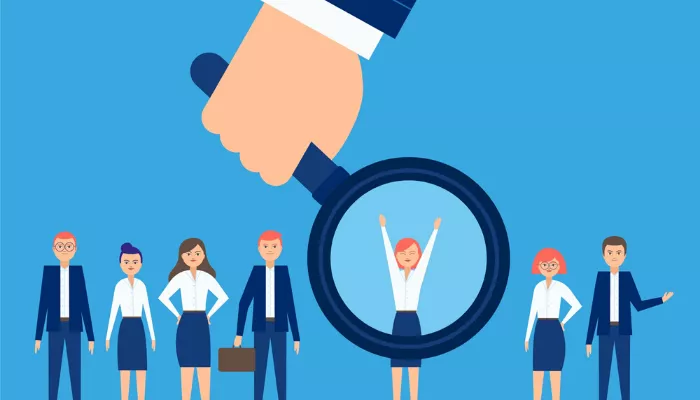

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Data Description </center>
    
* **sl_no:** Serial Number
* **gender:** Gender- Male='M',Female='F'
* **ssc_p:** Secondary Education percentage- 10th Grade
* **ssc_b:** Board of Education- Central/ Others
* **hsc_p:** Higher Secondary Education percentage- 12th Grade
* **hsc_b:** Board of Education- Central/ Others
* **hsc_s:** Specialization in Higher Secondary Education
* **degree_p:** Degree Percentage
* **degree_t:** Under Graduation(Degree type)- Field of degree education
* **workex:** Work Experience
* **etest_p:** Employability test percentage ( conducted by college)
* **specialisation:** Post Graduation(MBA)- Specialization
* **mba_p:** MBA percentage
* **status:** Status of placement- Placed/Not placed
* **salary:** Salary offered by corporate to candidates

# Load Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
df.head(n=5)

In [ ]:
df.info()

In [ ]:
df.shape

# Descriptive Statistics

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df['status'].value_counts()

In [ ]:
df = df.drop('sl_no',axis=1)
df['salary'] = df['salary'].fillna(0)

In [ ]:
df.head(n=5)

# Data Visualization

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
df['gender'].value_counts().plot(kind='bar',title='gender')
plt.subplot(4,2,2)
df['ssc_b'].value_counts().plot(kind='bar',title='ssc_b')
plt.subplot(4,2,3)
df['hsc_b'].value_counts().plot(kind='bar',title='hsc_b')
plt.subplot(4,2,4)
df['hsc_s'].value_counts().plot(kind='bar',title='hsc_s')
plt.subplot(4,2,5)
df['degree_t'].value_counts().plot(kind='bar',title='degree_t')
plt.subplot(4,2,6)
df['workex'].value_counts().plot(kind='bar',title='workex')
plt.subplot(4,2,7)
df['specialisation'].value_counts().plot(kind='bar',title='specialisation')
plt.subplot(4,2,8)
df['status'].value_counts().plot(kind='bar',title='status')
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
df['ssc_p'].value_counts().plot(kind='hist',title='ssc_p')
plt.subplot(3,2,2)
df['hsc_p'].value_counts().plot(kind='hist',title='hsc_p')
plt.subplot(3,2,3)
df['etest_p'].value_counts().plot(kind='hist',title='etest_p')
plt.subplot(3,2,4)
df['mba_p'].value_counts().plot(kind='hist',title='mba_p')
plt.subplot(3,2,5)
df['salary'].value_counts().plot(kind='hist',title='salary')
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="gender")
plt.subplot(5,2,2)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="degree_t")
plt.subplot(5,2,3)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="gender")
plt.subplot(5,2,4)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="degree_t")
plt.subplot(5,2,5)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="gender")
plt.subplot(5,2,6)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="degree_t")
plt.subplot(5,2,7)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="gender")
plt.subplot(5,2,8)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="degree_t")
plt.subplot(5,2,9)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="gender")
plt.subplot(5,2,10)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="degree_t")
plt.show()

In [ ]:
sns.pairplot(df, hue="degree_t")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(n=5)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
plt.figure(figsize=(20,25))
for i,col in enumerate(df.columns,1):
    plt.subplot(7,2,i)
    sns.boxplot(data=df,x=col, orient="h")
plt.show()

In [ ]:
plt.figure(figsize=(20,25))
for i,col in enumerate(df.columns,1):
    plt.subplot(7,2,i)
    sns.violinplot(data=df,x=df[col],orient='h')
plt.show()

In [ ]:
df.head(n=5)

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Data Preprocessing </center>

In [ ]:
x = df.drop('status',axis=1)
y = df['status']

In [ ]:
x=x.values
y=y.values

In [ ]:
split = int(0.9*x.shape[0])
print(split)

x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

In [ ]:
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

x_train = (x_train-x_mean)/x_std

x_test = (x_test-x_mean)/x_std

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Models </center>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

log_acc=accuracy_score(y_test,log_reg.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(x_test))*100))

In [ ]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, log_reg.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred= log_reg.predict(x_test).ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Logistic (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

d_acc=accuracy_score(y_test,d_tree.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,d_tree.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,d_tree.predict(x_test))*100))

In [ ]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, d_tree.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred= d_tree.predict(x_test).ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Decision (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
r_for = RandomForestClassifier()
r_for.fit(x_train,y_train)

r_acc=accuracy_score(y_test,r_for.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,r_for.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,r_for.predict(x_test))*100))

In [ ]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, r_for.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred= r_for.predict(x_test).ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Random forest (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
k_nei = KNeighborsClassifier()
k_nei.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_nei.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,k_nei.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,k_nei.predict(x_test))*100))

In [ ]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, k_nei.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred= k_nei.predict(x_test).ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='K_nei (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
s_vec = SVC()
s_vec.fit(x_train,y_train)

s_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,s_vec.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,s_vec.predict(x_test))*100))

In [ ]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, s_vec.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred= s_vec.predict(x_test).ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='SVC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
g_clf = GaussianNB()
g_clf.fit(x_train,y_train)

g_acc = accuracy_score(y_test,g_clf.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,g_clf.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,g_clf.predict(x_test))*100))

In [ ]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, g_clf.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred= g_clf.predict(x_test).ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='gaussian (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Random Forest Classifier',  'Gaussian'],
    'Score': [ log_acc,k_acc, s_acc, d_acc, r_acc, g_acc]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Score',data=models)
plt.show()

In [ ]:
x1 = df.drop('salary',axis=1)
y1 = df['salary']

In [ ]:
x1 = x1.values
y1 = y1.values

In [ ]:
split = int(0.9*x1.shape[0])
print(split)

x_train1 = x1[:split,:]
y_train1 = y1[:split]

x_test1 = x1[split:,:]
y_test1 = y1[split:]

print(x_train1.shape,y_train1.shape)
print(x_test1.shape,y_test1.shape)

In [ ]:
x_mean1 = x_train1.mean(axis=0)
x_std1 = x_train1.std(axis=0)

x_train1 = (x_train1-x_mean1)/x_std1

x_test1 = (x_test1-x_mean1)/x_std1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [ ]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train1,y_train1)

k_acc = r2_score(y_test1,k_reg.predict(x_test1))

print("Train accuracy:", (k_reg.score(x_train1,y_train1))*100)
print("Test accuracy:", (k_reg.score(x_test1,y_test1))*100)

In [ ]:
calculation = pd.DataFrame(np.c_[y_test1,k_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(k_reg.predict(x_test1), color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [ ]:
l_reg = LinearRegression()
l_reg.fit(x_train1,y_train1)

l_acc = r2_score(y_test1,l_reg.predict(x_test1))

print("Train accuracy:", (l_reg.score(x_train1,y_train1))*100)
print("Test accuracy:", (l_reg.score(x_test1,y_test1))*100)

In [ ]:
calculation = pd.DataFrame(np.c_[y_test1,l_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(l_reg.predict(x_test1), color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train1,y_train1)

d_acc = r2_score(y_test1,d_reg.predict(x_test1))

print("Train accuracy:", (d_reg.score(x_train1,y_train1))*100)
print("Test accuracy:", (d_reg.score(x_test1,y_test1))*100)

In [ ]:
calculation = pd.DataFrame(np.c_[y_test1,d_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(d_reg.predict(x_test1), color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [ ]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train1,y_train1)

r_acc = r2_score(y_test1,r_reg.predict(x_test1))

print("Training accuracy:",(r_reg.score(x_train1,y_train1))*100)
print("Test accuracy:",(r_reg.score(x_test1,y_test1))*100)

In [ ]:
calculation = pd.DataFrame(np.c_[y_test1,r_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(r_reg.predict(x_test1), color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [ ]:
x_reg = XGBRegressor()
x_reg.fit(x_train1,y_train1)

x_acc = r2_score(y_test1,x_reg.predict(x_test1))

print("Training accuracy:",(x_reg.score(x_train1,y_train1))*100)
print("Test accuracy:",(x_reg.score(x_test1,y_test1))*100)

In [ ]:
calculation = pd.DataFrame(np.c_[y_test1,x_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(x_reg.predict(x_test1), color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [ ]:
models = pd.DataFrame({
    'Models': ['Knn','Linear','DecisionTree','RandomForest','XGB'],
    'Scores': [k_acc,l_acc,d_acc,r_acc,x_acc]

})

models.sort_values(by = 'Scores',ascending = False)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Models',y='Scores',data=models)
plt.show()